<a href="https://colab.research.google.com/github/NesrineTahmi/ML-models-from-scratch/blob/main/KNN/KNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN) — From Scratch using NumPy


*In this notebook, I implement the K-Nearest Neighbors (KNN) algorithm from scratch, without using scikit-learn.*

## 1. Imports

In [56]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from collections import Counter

## 2. Loading data set

In [65]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

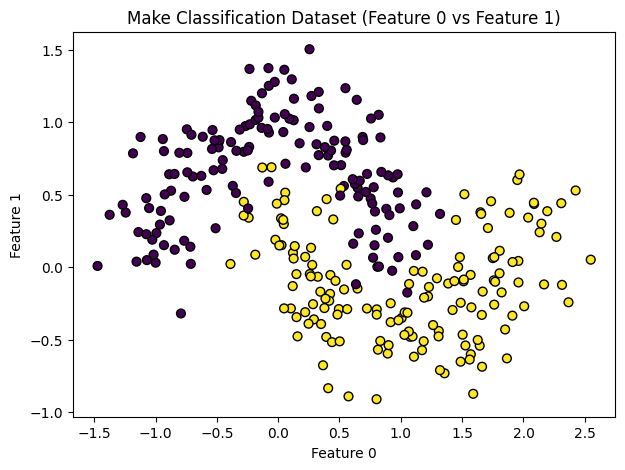

In [66]:
plt.figure(figsize=(7,5))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,          # color by true class
    cmap='viridis',
    s=40,
    edgecolor='k'
)
plt.title("Make Classification Dataset (Feature 0 vs Feature 1)")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


## 3. Implementing KNN algorithm

In [59]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
      predictions = []

      for x in X:
          label = self._predict_one(x)
          predictions.append(label)

      return predictions


    def _predict_one(self, x):
        dist_list = []
        for index, train_x in enumerate(self.X_train):
          dist = self._distance(x, train_x)
          dist_list.append((dist, index))

        dist_list_sorted = sorted(dist_list)
        k_nearest = dist_list_sorted[:self.k] # we take the first k elements

        indices = [] #we take all the indices in k_nearest
        for (dist, idx) in k_nearest:
          indices.append(idx)

        neighbors_labels = []
        for i in indices:
          neighbors_labels.append(self.y_train[i])

        return Counter(neighbors_labels).most_common(1)[0][0]


    def _distance(self, a, b):
        diff = a - b
        dist = np.sqrt(np.sum(diff ** 2))
        return dist




### 4. Testing the model

In [64]:
knn_model = KNN(3)

knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)

pred = np.array(pred)
accuracy = np.mean(pred == y_test)

print("knn accuracy : ", accuracy)

knn accuracy :  0.9833333333333333


## 5. Visualisating the effect of k on KNN

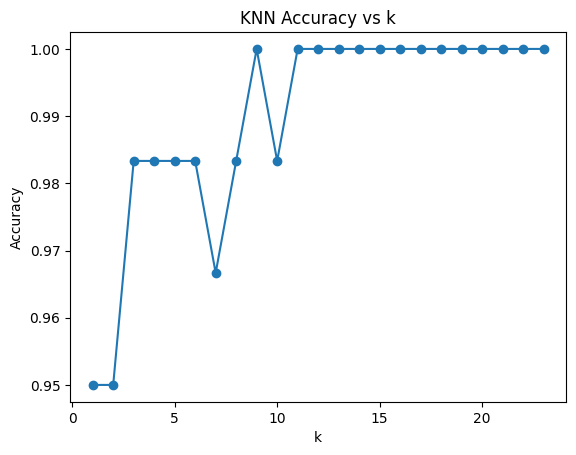

In [61]:
accs = []
ks = range(1, 24)

for k in ks:
    knn = KNN(k)
    knn.fit(X_train, y_train)
    p = np.array(knn.predict(X_test))
    accs.append(np.mean(p == y_test))

plt.plot(ks, accs, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.show()
